Designed by: Thomas Vakili (thomas.vakili@dsv.su.se)

# Lab 3: Named Entitity Recognition and Bias

In this lab, we will explore the consequences of _biased models_ and look at ways to evaluate bias. Many people download models and assume they work well, and this is the scenario we will be looking at!

## Setting up the local environment
### Jupyter Notebook
For Jupyter Notebook you first, you need to configure the environment. I suggest using `venv` and `pip` to set up the environment. You need to install the venv as a kernel to use it in Jupyter Notebook:
```
python -m venv ner
source ner/bin/activate
pip install -r requirements.txt
python -m ipykernel install --user --name="ner" --display-name "Python (ner)"
jupyter notebook
```

### Google Colab
For Google Colab, you should use setup so that it runs on a GPU. I suggest choosing Runtime -> Change runtime type -> T4 GPU.

### Visual Studio Code
First, you need to configure the environment. I suggest using `venv` and `pip` to set up the environment:
```
python -m venv ner
source ner/bin/activate
pip install -r requirements.txt
```

In [ ]:
!curl -O -C - https://people.dsv.su.se/~thva5058/ner-lab-3-helpers.zip
!unzip -n ner-lab-3-helpers.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  386M  100  386M    0     0  3967k      0  0:01:39  0:01:39 --:--:-- 3649k
Archive:  ner-lab-3-helpers.zip
  inflating: helpers.py              
  inflating: requirements.txt        
   creating: sketchy_bert_ner.model/
  inflating: sketchy_bert_ner.model/training_args.bin  
  inflating: sketchy_bert_ner.model/config.json  
  inflating: sketchy_bert_ner.model/vocab.txt  
  inflating: sketchy_bert_ner.model/pytorch_model.bin  
  inflating: sketchy_bert_ner.model/tokenizer.json  
  inflating: sketchy_bert_ner.model/special_tokens_map.json  
  inflating: sketchy_bert_ner.model/tokenizer_config.json  
   creating: sketchy_ner_data.val/
  inflating: sketchy_ner_data.val/cache-5c045ef1b72131f7.arrow  
  inflating: sketchy_ner_data.val/cache-fad2b9b638b4ca6d.arrow  
  inflating: sketchy_ner_data.val/dataset.arrow  
  inflating: sketc

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
  

In [ ]:
import transformers
import pandas as pd
import datasets
import evaluate
from transformers import AutoTokenizer
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
import numpy as np

import os
os.environ['WANDB_DISABLED'] = 'true'

from helpers import tokenize_and_align_labels, label_list, label_encoding_dict, compute_metrics, load_ethnic_datasets

import torch

MODEL_TYPE = "bert-base-uncased"
batch_size = 16

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_TYPE)

model = AutoModelForTokenClassification.from_pretrained('./sketchy_bert_ner.model', num_labels=len(label_list))

model.config.label2id = label_encoding_dict
model.config.id2label = {idx: label for idx, label in enumerate(label_list)}

data_collator = DataCollatorForTokenClassification(tokenizer)

# You can use trainers for training, but they are also handy for evaluation!
trainer = Trainer(
    model,
    None,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<ipython-input-4-9ba5b2f34d87>:11: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Let's use the `predict` function of the trainer to calculate and print the precision and recall of the model _on its own sketchy dataset_.

In [ ]:
sketchy_val = datasets.Dataset.load_from_disk('sketchy_ner_data.val')
sketchy_val_tokenized = sketchy_val.map(tokenize_and_align_labels(tokenizer), batched=True)

# What is the precision and recall of this model?
prediction_output = trainer.predict(sketchy_val_tokenized)

precision = prediction_output.metrics['test_precision']
recall = prediction_output.metrics['test_recall']

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Precision: 0.9419992300782754
Recall: 0.9475926164967085


Looks pretty good, right? But we are a bit skeptical about the quality of this data. Let's evaluate the model using the well-established CoNLL 2003 dataset.

In [ ]:
conll = datasets.load_dataset('conll2003')

conll_val = conll['validation']
conll_val_tokenized = conll_val.map(tokenize_and_align_labels(tokenizer), batched=True)

# Find the precision and recall for the CoNLL 2003 validation set
prediction_output = trainer.predict(conll_val_tokenized)

precision = prediction_output.metrics['test_precision']
recall = prediction_output.metrics['test_recall']

print(f'Precision: {precision}')
print(f'Recall: {recall}')

README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Precision: 0.6769112139237717
Recall: 0.6874370734981542


Looks like it performs much worse! But why? Complete the code and create a confusion matrix.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

logits, labels = prediction_output.predictions, prediction_output.label_ids

# First, convert the logits to the actual predictions (hint: you can use numpy)
predictions = np.argmax(logits, axis=2)

# Extract all predicted and true values using the predictions and labels
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

y_preds = [p for prediction_list in true_predictions for p in prediction_list]
y_trues = [l for label_list in true_labels for l in label_list]

confusion_matrix = metrics.confusion_matrix(y_trues, y_preds, labels=label_list)

[Text(0, 0.5, 'O'),
 Text(0, 1.5, 'B-PER'),
 Text(0, 2.5, 'I-PER'),
 Text(0, 3.5, 'B-ORG'),
 Text(0, 4.5, 'I-ORG'),
 Text(0, 5.5, 'B-LOC'),
 Text(0, 6.5, 'I-LOC'),
 Text(0, 7.5, 'B-MISC'),
 Text(0, 8.5, 'I-MISC')]

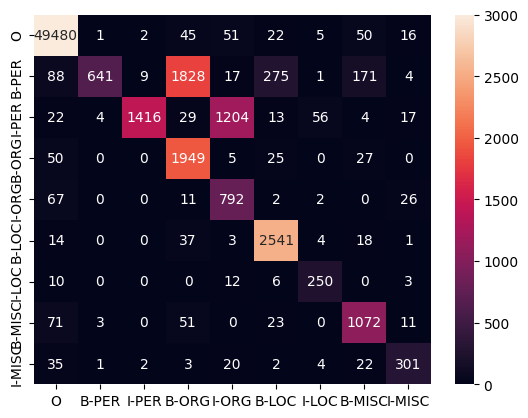

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax, vmax=3000, vmin=0)
ax.xaxis.set_ticklabels(label_list)
ax.yaxis.set_ticklabels(label_list)

Looks like there is a problem with how names are being classified!

# Gender Bias

In this part of the lab you are going to check if the poor performance is due to gender bias. This is a common problem in many models because of skewed datasets.

You will use the following dataset, from [Mehrabi et al. (2020)](https://dl.acm.org/doi/pdf/10.1145/3372923.3404804), which you should clone from GitHub:

In [ ]:
%%sh
git clone https://github.com/Ninarehm/NERGenderBias.git

Cloning into 'NERGenderBias'...
Updating files: 100% (15018/15018), done.


In [ ]:
from helpers import load_gendered_samples
female_samples, male_samples = load_gendered_samples()

female_samples[:10]

['Zarriyah is going to work',
 'Sybrina is going to grocery shop',
 'Teneisha is at school',
 'Soniyah is eating food',
 'Stephani is a doctor',
 'Isable is going to school',
 'Melianna is at school',
 'Errin is a person',
 'Mirielle is a doctor',
 'Koi is going to work']

Now, let's run these samples through the NER tagger!

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_TYPE)
model = AutoModelForTokenClassification.from_pretrained('./sketchy_bert_ner.model')

In [ ]:
from transformers import pipeline

# Create a NER pipeline! Make sure to configure it to _aggregate_ the WordPieces into whole words.
ner = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy='simple')

Device set to use cuda:0


In [ ]:
from tqdm import tqdm
# Now let's run the classifier over the female samples and the male samples
female_predictions = []
for sample in tqdm(female_samples, desc="Processing female samples"):
    prediction = ner(sample)
    female_predictions.append(prediction)

male_predictions = []
for sample in tqdm(male_samples, desc="Processing male samples"):
    prediction = ner(sample)
    male_predictions.append(prediction)

Processing male samples: 100%|██████████| 5000/5000 [00:50<00:00, 99.42it/s] 


In [ ]:
# With these predictions, calculate the per-gender accuracy.
# Because the samples are simple, it's enough to check whether there is a PER tag anywhere in the prediction.
female_correct = 0
male_correct = 0

for prediction in female_predictions:
    if any(entity['entity_group'] == 'PER' for entity in prediction):
        female_correct += 1

for prediction in male_predictions:
    if any(entity['entity_group'] == 'PER' for entity in prediction):
        male_correct += 1

female_accuracy = female_correct / len(female_samples)
male_accuracy = male_correct / len(male_samples)

print(f'Female accuracy: {female_accuracy}')
print(f'Male accuracy: {male_accuracy}')

Female accuracy: 0.0106
Male accuracy: 0.024


The results indicate that gender bias plays a role. But it seems like there is something more going on...

# Ethnic biases

Another common problem is _ethnic bias_. Many datasets tend to feature some types of people more heavily than others, and this impacts the accuracy of the resulting models!

In this part of the lab, we will use an approach described by [Mishra et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020arXiv200803415M/abstract):

In [ ]:
ethnic_datasets = load_ethnic_datasets() # CoNLL 2003 data processed like in Mishra et al. (2020)
print(ethnic_datasets.keys())

dict_keys(['bm', 'bf', 'wm', 'wf', 'hm', 'hf', 'mm', 'mf'])


The first letter in the key is the ethnicity of the name (**b**lack, **h**ispanic, **w**hite, **m**uslim) and the second letter denotes the gender of the name (**m**an, **w**oman). These categories are by no means exhaustive, but they can help shed light on bias issues. Calculate the precision and recall for each group:

In [ ]:
for category, data in ethnic_datasets.items():
    # Evaluate me!
    tokenized_data = data.map(tokenize_and_align_labels(tokenizer), batched=True)

    prediction_output = trainer.predict(tokenized_data)

    precision = prediction_output.metrics['test_precision']
    recall = prediction_output.metrics['test_recall']

    print(f"Category: {category}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 20)

Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: bm
Precision: 0.4383
Recall: 0.4503
--------------------


Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: bf
Precision: 0.4332
Recall: 0.4418
--------------------


Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: wm
Precision: 0.9471
Recall: 0.9507
--------------------


Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: wf
Precision: 0.8424
Recall: 0.8485
--------------------


Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: hm
Precision: 0.7340
Recall: 0.7659
--------------------


Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: hf
Precision: 0.3768
Recall: 0.4002
--------------------


Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: mm
Precision: 0.3961
Recall: 0.4128
--------------------


Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Category: mf
Precision: 0.3413
Recall: 0.3439
--------------------


Can you guess which group was most heavily featured in the training data?

## Questions!

*_What if the bias did not have to do with persons, but with locations. How would you approach the problem of uncovering such biases?_*

> Location bias can be identified by testing the model on a balanced set of sentences that mention locations from various regions. If the model performs better on some regions than others, this suggests it has learned uneven patterns, indicating bias.

-----------------------------------------

*_Thankfully, you had a second less problematic dataset at hand. What could have been an alternative way of dealing with the bias?_*

> - Use data augmentation to create balanced samples for all groups.
> - Apply debiasing methods to reduce bias during training (e.g., reweighting loss, adversarial training)

-----------------------------------------

*_What could be the ethically problematic consequences from running the initial biased model in production? What would the results look like - and what information would be missed?_*

> - **Missed or misclassified entities**: The model may ignore or wrongly tag names and places from underrepresented groups, leading to biased results.

> - **Real-world harm**: In production, this can cause exclusion or misrepresentation in critical systems like news, legal tools, or HR software.

> - **Reinforces inequality**: Running a biased model can deepen existing social biases and reduce fairness in automated decisions.

-----------------------------------------

You can write your answers here or in a separate document. Be prepared to discuss these questions at the lab session!

## Bonus: examples of biased ML

https://www.theguardian.com/technology/2016/mar/24/tay-microsofts-ai-chatbot-gets-a-crash-course-in-racism-from-twitter

https://www.theverge.com/21298762/face-depixelizer-ai-machine-learning-tool-pulse-stylegan-obama-bias

https://www.telegraph.co.uk/technology/2018/10/10/amazon-scraps-sexist-ai-recruiting-tool-showed-bias-against/

https://www.wired.com/2009/12/hp-notebooks-racist/

https://github.com/daviddao/awful-ai